In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\duckq\Downloads\data.csv")


for col in ['std_delta', 'std_time', 'std_tx_value', 'std_time_vw']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


print("\n--- Dataset Shape ---")
print(df.shape)

stats = df[["trader_pnl", "trader_volume", "transaction_count", "transactions_per_day"]].describe()
print(stats)

# Correlations to see relationships
correlations = df[["trader_pnl", "trader_volume", "transaction_count", "transactions_per_day"]].corr()
print("\nCorrelations:")
print(correlations)




--- Dataset Shape ---
(604578, 41)
         trader_pnl  trader_volume  transaction_count  transactions_per_day
count  6.045780e+05   6.045780e+05      604578.000000         604578.000000
mean   1.917139e-14   1.113997e+04          43.468442              3.863275
std    6.471315e+03   3.113899e+05        1142.982224             14.937918
min   -1.219870e+06   1.000000e-02           1.000000              1.000000
25%   -7.526793e+00   3.622564e+01           3.000000              1.166667
50%   -5.342860e-02   1.483500e+02           7.000000              2.000000
75%    7.987589e-01   7.540000e+02          16.000000              3.266667
max    1.103256e+06   9.157941e+07      419499.000000           4805.647059

Correlations:
                      trader_pnl  trader_volume  transaction_count  \
trader_pnl              1.000000       0.407567           0.197972   
trader_volume           0.407567       1.000000           0.604309   
transaction_count       0.197972       0.604309        

In [9]:
print("\n--- Summary Statistics ---")
print(df.describe().T)




--- Summary Statistics ---
                                                    count          mean  \
trader_pnl                                       604578.0  1.917139e-14   
trader_volume                                    604578.0  1.113997e+04   
transaction_count                                604578.0  4.346844e+01   
transactions_per_day                             604578.0  3.863275e+00   
volume_per_day                                   604578.0  9.694517e+02   
markets_per_day                                  604578.0  1.481643e+00   
price_levels_consumed                            604578.0  2.487026e-01   
price_levels_per_transaction                     604578.0  2.232357e-03   
price_levels_consumed_vw                         604578.0  8.868635e+01   
mean_delta                                       604578.0  3.292027e-01   
std_delta                                        528723.0  8.435474e-02   
topic_arts, culture, entertainment and media     604578.0  7.538169e-02 

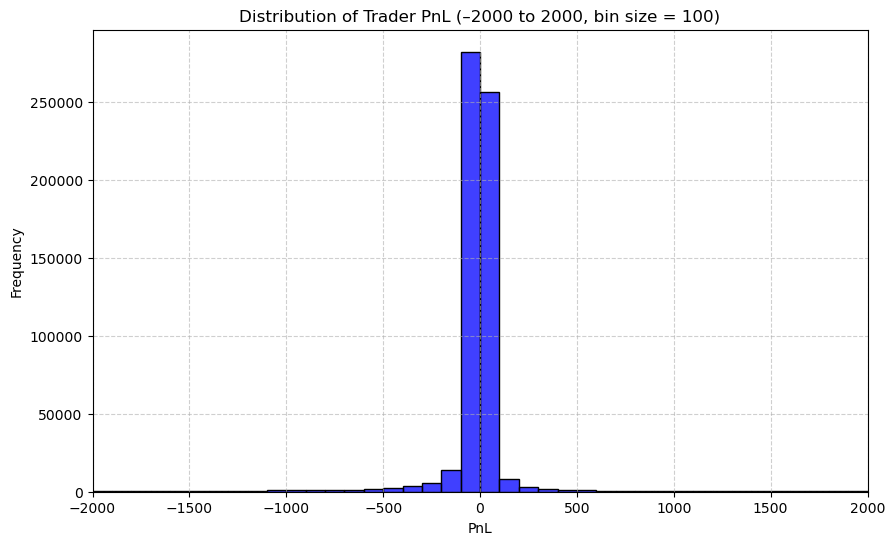

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(df["trader_pnl"], 
             bins=range(-2000, 2001, 100),  # bins of size 100
             kde=False, 
             color="blue")

plt.xlim(-2000, 2000)   # limit x-axis
plt.title("Distribution of Trader PnL (–2000 to 2000, bin size = 100)")
plt.xlabel("PnL")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

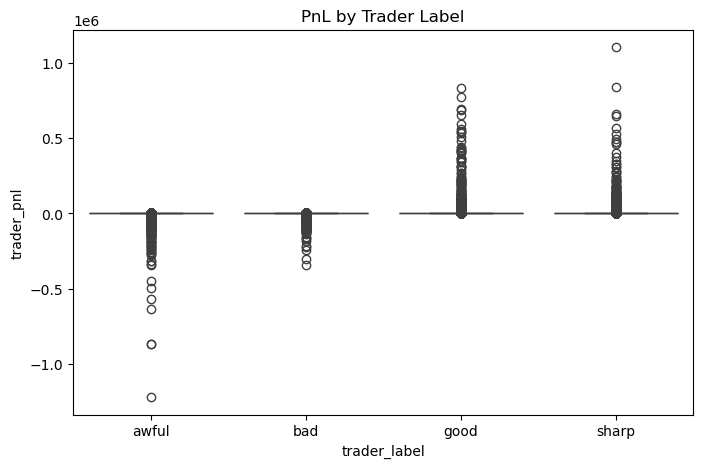

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x="trader_label", y="trader_pnl", data=df, order=["awful","bad","good","sharp"])
plt.title("PnL by Trader Label")
plt.show()


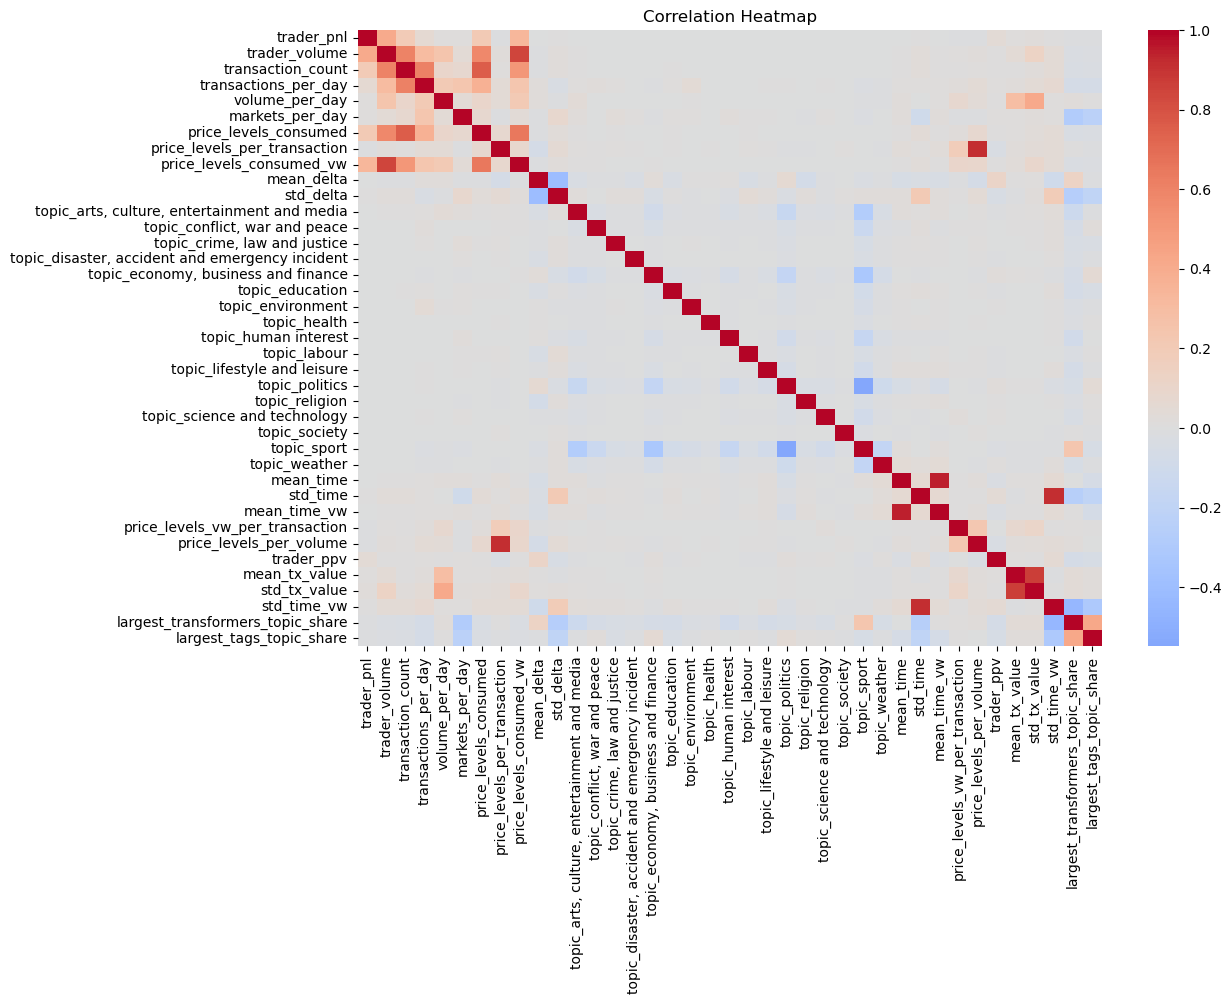

In [11]:


corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [12]:

# Top correlations with PnL
print("\n--- Correlations with PnL ---")
print(corr["trader_pnl"].sort_values(ascending=False).head(10))
print(corr["trader_pnl"].sort_values(ascending=True).head(10))




--- Correlations with PnL ---
trader_pnl                  1.000000
trader_volume               0.407567
price_levels_consumed_vw    0.335298
price_levels_consumed       0.211286
transaction_count           0.197972
transactions_per_day        0.060536
trader_ppv                  0.044005
std_tx_value                0.014504
markets_per_day             0.011345
mean_tx_value               0.010136
Name: trader_pnl, dtype: float64
price_levels_per_transaction          -0.014636
price_levels_per_volume               -0.010107
largest_transformers_topic_share      -0.005989
largest_tags_topic_share              -0.005089
price_levels_vw_per_transaction       -0.004408
topic_lifestyle and leisure           -0.001563
topic_economy, business and finance   -0.000885
topic_weather                         -0.000724
topic_human interest                  -0.000713
topic_environment                     -0.000221
Name: trader_pnl, dtype: float64


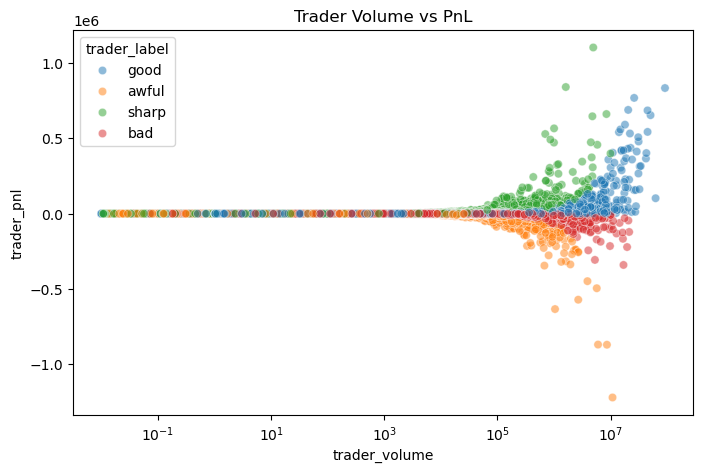

In [21]:

plt.figure(figsize=(8,5))
sns.scatterplot(x="trader_volume", y="trader_pnl", hue="trader_label", alpha=0.5, data=df)
plt.title("Trader Volume vs PnL")
plt.xscale("log")  # many traders may have low/high skewed volumes
plt.show()


In [16]:


avg_pnl_by_label = df.groupby("trader_label")["trader_pnl"].mean()
print("\n--- Avg PnL by Trader Label ---")
print(avg_pnl_by_label)



--- Avg PnL by Trader Label ---
trader_label
awful   -476.366598
bad     -180.530658
good     226.707912
sharp    550.142516
Name: trader_pnl, dtype: float64
